In [330]:
import modelbase
from modelbase.ode import Model, Simulator

In [331]:
import matplotlib.pyplot as plt

In [332]:
m = Model()

In [333]:
p = {'k1': 1, 'k2':1., 'k3': 1., 'k4':5., 'k5':1., 'N':4}

In [334]:
m.add_parameters(p)

Simple three subpopulations of an organism:
- M - motile
- P - producer
- R - resistant

\begin{eqnarray}
\frac{dR}{dt} &=& k_1NR - k_4R - k_2RP,\\
\frac{dP}{dt} &=& -k_3P + k_5M,\\
\frac{dM}{dt} &=& k_4R - k_5M\\
\end{eqnarray}

In [335]:
m.add_compounds(['R', 'P', 'M'])

In [336]:
# is the population constant?
#m.add_algebraic_module(
#    module_name='m_eq',
#    function= lambda n,x,y: n-x-y,
#    compounds=['R','P'],
#    derived_compounds='M',
#    parameters='N')

In [337]:
def generation(R, N, k1):
    return k1*N*R

In [338]:
m.add_reaction(rate_name='generation',
    function = generation,
    stoichiometry={'R':1},
    modifiers=['R'],
    parameters=['k1','N'],
    reversible=False,
)

In [339]:
def resistance(R, P, k2):
    return R*P*k2

In [340]:
m.add_reaction(rate_name='resistance',
    function = resistance,
    stoichiometry={'R':-1},
    modifiers=['P'],
    parameters=['k2'],
    reversible=False,
)

In [341]:
m.add_reaction(
    rate_name="v2",
    function=lambda x, t: x * t,
    stoichiometry={"R": -1, 'M':1},
    parameters=["k4"],
)

In [342]:
m.add_reaction(
    rate_name="v3",
    function=lambda x, t: x * t,
    stoichiometry={"P": -1},
    parameters=["k3"],
)

In [343]:
m.add_reaction(
    rate_name="v4",
    function=lambda x, t: x * t,
    stoichiometry={'P':1, 'M':-1},
    parameters=["k5"],
)

In [344]:
m.get_stoichiometric_df()

generation  resistance   v2   v3   v4
M         0.0         0.0  1.0  0.0 -1.0
P         0.0         0.0  0.0 -1.0  1.0
R         1.0        -1.0 -1.0  0.0  0.0

In [352]:
y0 = {'R':1, 'P':1, 'M':1}

In [382]:
m.get_right_hand_side(y0, t=0)

{'dRdt': 2.0, 'dPdt': 0.9, 'dMdt': 0.0}

In [397]:
s = Simulator(m)
m.update_parameters({'N': 4., 'k1':1., 'k2': 1.,'k3':10., 'k4':1., 'k5':1.})

In [398]:
s.initialise(y0)

In [399]:
s.simulate(16, steps=1000);
s.simulate(45, steps=1000);
s.simulate(80, steps=1000);

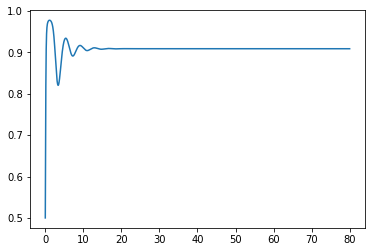

In [400]:
plt.plot(s.get_time(), s.get_variable('R')/(s.get_variable('R')+s.get_variable('P')))

In [245]:
160/60

2.6666666666666665

In [248]:
25*0.025

0.625